## Titanic dataset discovery

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. 

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland, before heading west to New York. On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the hull plates to buckle inwards along her starboard (right) side and opened five of her sixteen watertight compartments to the sea; she could only survive four flooding. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived and brought aboard an estimated 705 survivors. 
    
<img align="left" style="padding-right:10px; width: 400px" src="https://media-exp1.licdn.com/dms/image/C4D22AQE50TOapAkZ8w/feedshare-shrink_2048_1536/0?e=1585785600&v=beta&t=6iz2C_g_QqjbZNz9OJn8u_dH9AxwHfacDIpCmPAYJWg">
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset file into "titanic" object
titanic = pd.read_csv("Titanic-1309-rows-biostatvanderbilt.csv")

# Let's have a look at the dataset attributes
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# until the last value 0-1308 
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
# Let's check the dataset info, variables types and null counts 
# (pclass, survived, name, sex, sibsp, parch, ticket are complete)
# (embarked miss one value, age is incomplete for 263 passengers)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
# Let's get few statistical data from the dataset (and mostly the mean of survivers: 38,19%)
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The dataset has 1309 entries. 
This dataset describes the survival status of individual passengers on the Titanic. The dataset has 12 variables:
- `PassengerId`
- `Survived`: 0 = No, 1 = Yes. **(As we can see on the table above `survived` mean, 38,19% of passengers survived)**
- `Pclass`: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Demographics: `Sex`, `Age`
- `Sibsp`: Number of siblings or spouses aboard the Titanic
- `Parch`: Number of parents or children aboard the Titanic
- `Ticket`: Passenger ticket number
- `Fare`: Passenger fare
- `Cabin`: Cabin number
- `Embarked`: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

## Checking and preparing the data
Dropping few columns and checking data values

In [6]:
titanic.drop(['name','body','boat','cabin'],axis=1,inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,female,29.00,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,male,0.92,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


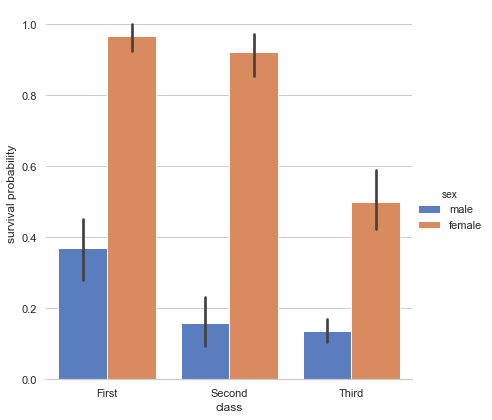

In [18]:
# Use Seaborn to visualize survived male and female per class in grouped barplots

import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")